In [22]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.4.0'

# A first look at a neural network
We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [31]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
train_images.ndim

3

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
digit = train_images[4, 7:-7: , 7:-7]
digit.shape



(14, 14)

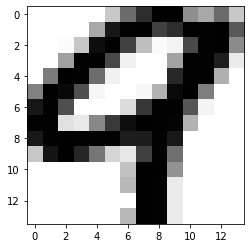

In [43]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Our workflow will be follow: first we will present our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predications for test_images, and we will verify if these predictions match the labels from test_labels.

Let's build our network 



In [9]:
from keras import models 
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

    A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
    An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
    Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).


In [10]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval. Previously, our training images for instance were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.


In [25]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [26]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
tf.config.experimental_run_functions_eagerly(True) 
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Epoch 1/5
  5/469 [..............................] - ETA: 10s - loss: 1.3937 - accuracy: 0.5875

/home/dongchan/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  use_legacy_function=False,


469/469 [==============================] - 9s 19ms/step - loss: 0.2543 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 0.1040 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0682 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0494 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0376 - accuracy: 0.9887


In [27]:
tset_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9781


In [28]:
print('test_acc:', test_acc)

test_acc: 0.9781000018119812




Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. 